# Image data and augmentation using Keras

####

### Importing Libraries

In [2]:
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using Tensorflow',tf.__version__)

Using Tensorflow 1.13.1


#### Instantiating

In [4]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40)

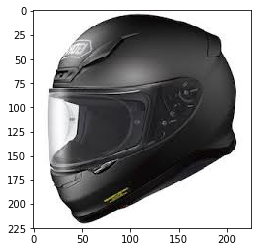

In [56]:
image_path = 'S:/Project Final Year/Testing images/Images/4.jpg'
path = 'S:/Project Final Year/Testing images'
plt.imshow(plt.imread(image_path))

Found 1 images belonging to 2 classes.


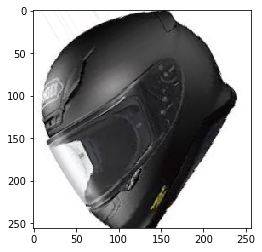

In [20]:
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Rotation

In [96]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

Found 1 images belonging to 2 classes.


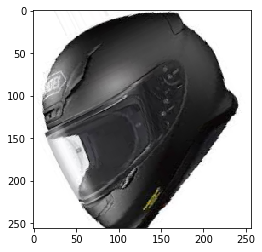

In [97]:
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Width and Height Shifts

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100,-50,0,50,100],
    height_shift_range = [-50,0,50]
)

Found 1 images belonging to 2 classes.


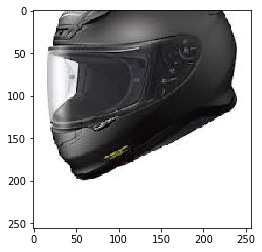

In [31]:
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Brightness

Found 1 images belonging to 2 classes.


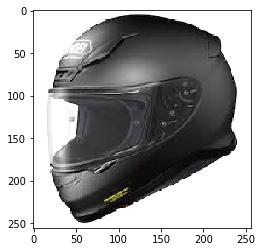

In [36]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5,2)
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Shear transformation

Found 1 images belonging to 2 classes.


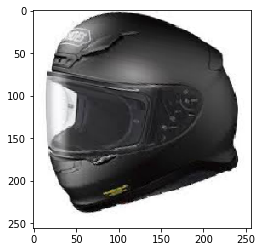

In [42]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Zoom

Found 1 images belonging to 2 classes.


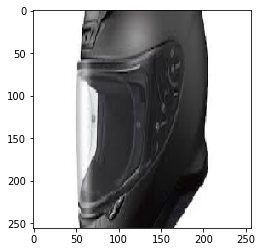

In [47]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.6
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Channel Shift

Found 1 images belonging to 2 classes.


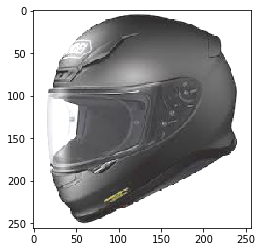

In [64]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

In [65]:
x.mean()

158.44041

In [66]:
np.array(Image.open(image_path)).mean()

134.4711769547325

## Flips

Found 1 images belonging to 2 classes.


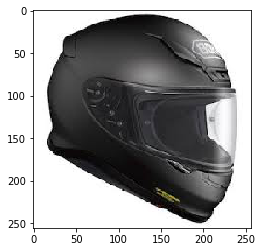

In [72]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Multiple augmentations

Found 1 images belonging to 2 classes.


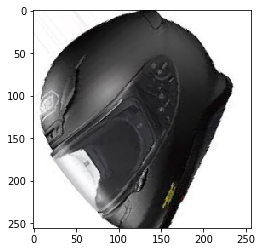

In [74]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

In [77]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50
)
x,y = next(generator.flow_from_directory('images'))
plt.imshow(x[0].astype('uint8'))

## Normalization

In [ ]:
x_train, y_train, x_test, y_test  = tf.keras.datasets.cifar10.load_data()
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    fearurewise_std_normalization = True
)

generator.fit(x_train)

In [ ]:
x,y = next(generator.flow(x_train, y_train))
print(x.mean(), x.std(), y)
print(x_train.mean())

## Rescaling and Normalization

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True, rotation_range=20
)

## Using in Model Training

In [87]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True, rotation_range=20
)

In [94]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(96,96,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])     

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrices=['accuracy']
)

In [ ]:
model = model.fit(
    generator.flow(x_train,y_train,epochs=1, steps_per_epoch=10)
)